In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

<center><h2>Интерпретируемость моделей машинного обучения</h2></center>

Пример интерпретируемости:
    
в модели линейной регрессии по прогнозированию цен на недвижимость

увеличение площеди квартиры приводит к увеличению цены.

<center><h2>Применение деревьев решений</h2></center>

```
Пример использования деревьев решения для задач классификации - 

определение кредитоспособности заемщика и принятие решения о выдаче кредита.
```

#### Решение задачи классификации 

#### пассажиров Титаника с использованием деревьев решений

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')

In [4]:
X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

In [5]:
max_depth_arr = np.arange(2, 20)
max_depth_arr

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [6]:
accuracy_valid = []
accuracy_train = []
for val in max_depth_arr:
    clf = DecisionTreeClassifier(max_depth=val, random_state=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print('max_depth = {} \n\tacc_valid = {} \n\tacc_train = {}\n'.format(val, acc_valid, acc_train))

max_depth = 2 
	acc_valid = 0.7757847533632287 
	acc_train = 0.8023952095808383

max_depth = 3 
	acc_valid = 0.8026905829596412 
	acc_train = 0.8323353293413174

max_depth = 4 
	acc_valid = 0.8071748878923767 
	acc_train = 0.842814371257485

max_depth = 5 
	acc_valid = 0.8026905829596412 
	acc_train = 0.8488023952095808

max_depth = 6 
	acc_valid = 0.7713004484304933 
	acc_train = 0.8577844311377245

max_depth = 7 
	acc_valid = 0.8116591928251121 
	acc_train = 0.875748502994012

max_depth = 8 
	acc_valid = 0.7623318385650224 
	acc_train = 0.8967065868263473

max_depth = 9 
	acc_valid = 0.7713004484304933 
	acc_train = 0.9131736526946108

max_depth = 10 
	acc_valid = 0.7443946188340808 
	acc_train = 0.9341317365269461

max_depth = 11 
	acc_valid = 0.7533632286995515 
	acc_train = 0.9491017964071856

max_depth = 12 
	acc_valid = 0.7488789237668162 
	acc_train = 0.9580838323353293

max_depth = 13 
	acc_valid = 0.7443946188340808 
	acc_train = 0.9700598802395209

max_depth = 14 
	acc_valid

(2, 19)

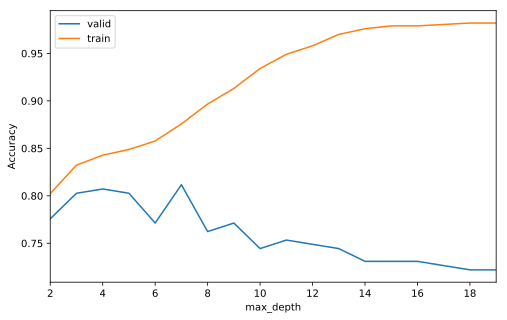

In [7]:
rcParams['figure.figsize'] = 8, 5
plt.plot(max_depth_arr, accuracy_valid)
plt.plot(max_depth_arr, accuracy_train)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['valid', 'train'])
plt.xlim(2, 19)

In [8]:
clf = DecisionTreeClassifier(max_depth=7, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [9]:
accuracy_score(y_valid, y_pred)

0.8116591928251121

#### RandomForest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
parameters = [{'n_estimators': [150, 200, 250], 
               'max_features': np.arange(5, 9),
               'max_depth': np.arange(5, 10)}]

In [13]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), 
                   param_grid=parameters,
                   scoring='accuracy',
                   cv=5)

<center><h4>Кросс-валидация</h4></center>

In [14]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [150, 200, 250], 'max_features': array([5, 6, 7, 8]), 'max_depth': array([5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [15]:
clf.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}

In [16]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.822 (+/-0.070) for {'max_depth': 5, 'max_features': 5, 'n_estimators': 150}
0.825 (+/-0.069) for {'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
0.822 (+/-0.067) for {'max_depth': 5, 'max_features': 5, 'n_estimators': 250}
0.819 (+/-0.079) for {'max_depth': 5, 'max_features': 6, 'n_estimators': 150}
0.819 (+/-0.079) for {'max_depth': 5, 'max_features': 6, 'n_estimators': 200}
0.820 (+/-0.079) for {'max_depth': 5, 'max_features': 6, 'n_estimators': 250}
0.822 (+/-0.077) for {'max_depth': 5, 'max_features': 7, 'n_estimators': 150}
0.823 (+/-0.075) for {'max_depth': 5, 'max_features': 7, 'n_estimators': 200}
0.822 (+/-0.073) for {'max_depth': 5, 'max_features': 7, 'n_estimators': 250}
0.819 (+/-0.061) for {'max_depth': 5, 'max_features': 8, 'n_estimators': 150}
0.816 (+/-0.068) for {'max_depth': 5, 'max_features': 8, 'n_estimators': 200}
0.820 (+/-0.066) for {'max_depth': 5, 'max_features': 8, 'n_estimators': 250}
0.817 (+/-0.058) for {'max_depth': 6, 'max_features': 5, 'n_esti

In [17]:
y_pred = clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8161434977578476

Полученный классификатор clf равносилен такой модели:

In [18]:
clf = RandomForestClassifier(max_depth = 5, max_features = 5, n_estimators = 200, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [19]:
accuracy_score(y_valid, y_pred)

0.8161434977578476